# HHA550_Stroke Prediction Dataset

## Healtcare-dataset-stroke-data

#### (Check Modules folders for csv and ipynb for each class)

# DATA
## Stroke Prediction Dataset


#### 
Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

    1) id: unique identifier

    2) gender: "Male", "Female" or "Other"

    3) age: age of the patient

    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

    6) ever_married: "No" or "Yes"

    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

    8) Residence_type: "Rural" or "Urban"

    9) avg_glucose_level: average glucose level in blood

    10) bmi: body mass index

    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

    12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# .CSV Data
### Healtcare-dataset-stroke-data.csv

# IMPORTING Everthing

In [1]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [ ]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [3]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [4]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.

#Find the file path to the .csv
    #Then use code below to read .csv
# stroke = pd.read_csv('x')

#for PC file path will use /  
         #Original PC file path 'C:\Users\kaden\Desktop\HHA550_Stroke_Data\healthcare-dataset-stroke-data.csv'
         #Change PC file path for Python to C:/Users/kaden/Desktop/Python_Diabetes Dataset/dataset_diabetes/diabetic_data.csv'
    #for MAC file path will use //
         #Original MAC file path 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'
         #Change MAC file path for Python to 'C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv'

#for PC (running PC for this example)
# stroke = pd.read_csv('C:/Users/kaden/Desktop/HHA550_Stroke_Data/healthcare-dataset-stroke-data.csv')
stroke = pd.read_csv('healthcare-dataset-stroke-data(clean_dataset).csv')

#for MAC
#stroke = pd.read_csv('C://Users//kaden//Desktop//HHA550_Stroke_Data//healthcare-dataset-stroke-data.csv')

# Breaking the data up into Train & Test

In [5]:
train_df, valid_df, test_df = np.split(stroke.sample(frac=1, random_state=42), 
                                       [int(.7*len(stroke)), int(0.85*len(stroke))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [6]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
train_df.stroke.value_counts()

0    3404
1     173
Name: stroke, dtype: int64

In [8]:
valid_df.stroke.value_counts()

0    726
1     40
Name: stroke, dtype: int64

In [9]:
test_df.stroke.value_counts()

0    731
1     36
Name: stroke, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [10]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [11]:
# split the training data into positive and negative
rows_pos = train_df.stroke == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
stroke_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
stroke_df_balanced = stroke_df_balanced.sample(n = len(stroke_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(stroke_df_balanced), \
                                                calc_prevalence(stroke_df_balanced.stroke.values)))

Train balanced prevalence(n = 346):0.500


In [12]:
stroke_df_balanced.stroke.value_counts()

1    173
0    173
Name: stroke, dtype: int64

In [13]:
X_train = stroke_df_balanced.drop('stroke',axis=1)

y_train = stroke_df_balanced['stroke']

X_valid = valid_df.drop('stroke',axis=1)

y_valid = valid_df['stroke']

X_test = test_df.drop('stroke',axis=1)

y_test = test_df['stroke']

In [15]:
scaler=StandardScaler()
X_train[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.fit_transform(X_train[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])
X_valid[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.transform(X_valid[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])
X_test[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.transform(X_test[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])

# Creating and Understanding Models

In [16]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

y_valid_preds = lnr.predict(X_valid)

In [ ]:
y_valid_preds

## Logistic Regression

In [17]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.823
accuracy:0.738
recall:0.750
precision:0.136
specificity:0.737
prevalence:0.052
 


## Explaining Results

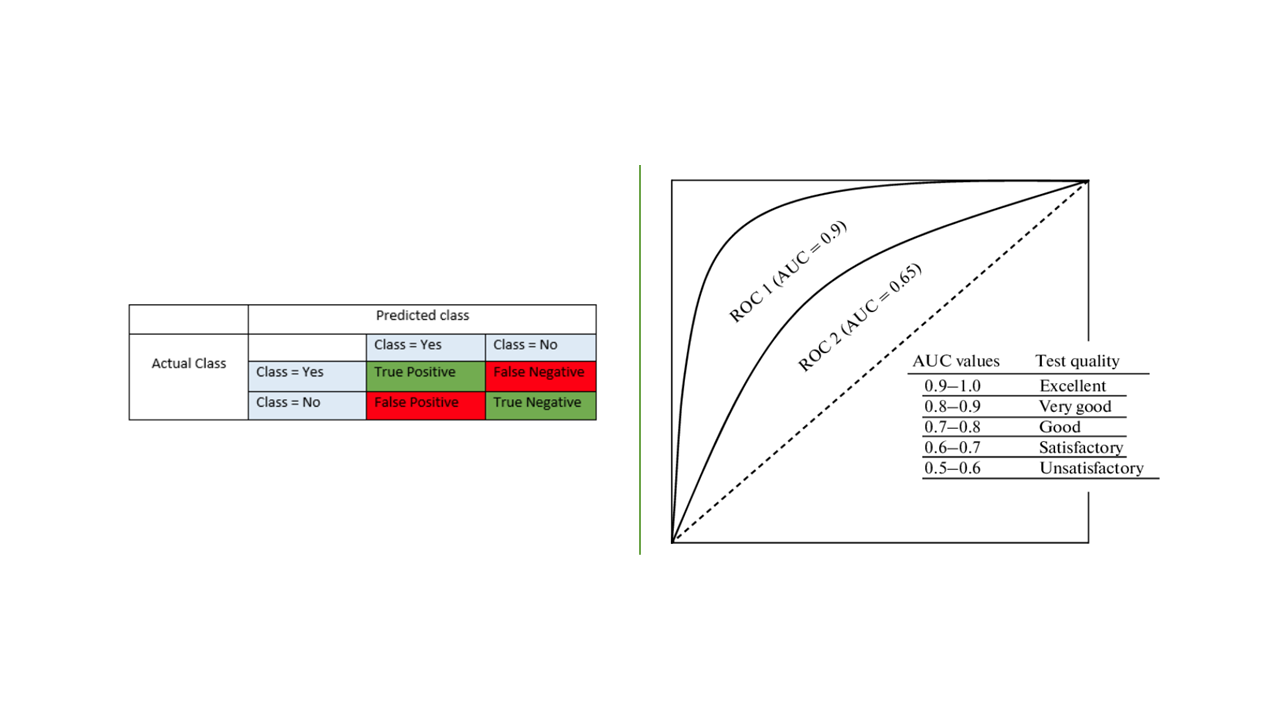

In [1]:
from IPython import display
display.Image("C:/Users/kaden/Desktop/HHA550_Stroke_Data/Explaining_Results.png")

#### AUC (area under the curve)
* values 0 to 1
* higher the AUC (closer to "1"), the better the performace of the model at distinguishing between the positive and negative clases.

#### Precision
* ratio between the correct predecitions and the total predicitons
* indicates how good is the model at watever it predicts

#### Recall
* (Sensitivity)
* Precision = TP/TP+F 
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

#### f1-score 
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)
* is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy

#### Support
* positive counts (values)

#### Accuracy
* how close a measurement is to the true value
* Accuracy = TP+TN/TP+FP+FN+TN
* is simply a ratio of correctly predicted observation to the total observations.

#### Macro avg
* all classes equally contribute to the final averaged metric

#### Weighted avg
* each classes’s contribution to the average is weighted by its size

#### Important Insights into Results
* If on average, your measurements for a given substance are close to the known value, but the measurements are far from each other, then you have accuracy without precision
* Which is better accuracy or precision?
** Accuracy is something you can fix in future measurements. Precision is more important in calculations. When using a measured value in a calculation, you can only be as precise as your least precise measurement
* Is precision more important than recall?
** Recall is more important where Overlooked Cases (False Negatives) are more costly than False Alarms (False Positive). Precision is more important where False Alarms (False Positives) are more costly than Overlooked Cases (False Negatives). The focus in these problems is in weeding out the negative cases.
* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).


#### Helpful Links
* https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1#:~:text=The%20macro%20average%20precision%20is,less%20in%20the%20weighted%20average. 
* https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 
* https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/#:~:text=Micro%2Daveraged%3A%20all%20samples%20equally,is%20weighted%20by%20its%20size

### Summary of Results (what is the most important?)
#### Logistic Regression vs Linear Regression results
* As per our use case we need the results to be classes i.e. Stroke or No-Stroke for which we need a model that works on classification.
* Using the Linear Regression as seen above is not giving us the results as 0 or 1 instead it is giving us the results in numerical form. The internal logic of linear regression does not work output the probability it just tries to get the output as close to the target in the training data. Whereas the logistic regression model works on probability principle.
* Linear regression would try to fit the data if it can be fit using straight line. If we just use regression then it can try to fit a curved surface too. Whereas the graph of Logistic regression takes the shape of a sigmoid. See the pictures below.

<p>
<img src = "LinearRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.1 - Linear Regression Example</center></b>

<p>
<img src = "LogisticRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.2 - Logistic Regression Example</center></b>

Lets look at some other models to see if we get better results.

## KNN Model

In [19]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.812
accuracy:0.713
recall:0.775
precision:0.128
specificity:0.698
prevalence:0.052
 


## Stochastic Gradient Descent Model

In [20]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.825
accuracy:0.731
recall:0.775
precision:0.136
specificity:0.729
prevalence:0.052
 


## Decision Tree

In [21]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.641
accuracy:0.680
recall:0.600
precision:0.095
specificity:0.685
prevalence:0.052
 


## Random Forest

In [22]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.822
accuracy:0.719
recall:0.750
precision:0.128
specificity:0.718
prevalence:0.052
 


## Linear SVC

In [23]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.820
accuracy:0.858
recall:0.450
precision:0.171
specificity:0.880
prevalence:0.052
 


## Gradient Boosting Model

In [24]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.798
accuracy:0.726
recall:0.675
precision:0.121
specificity:0.729
prevalence:0.052
 


## XGB Model

In [25]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.817
accuracy:0.722
recall:0.725
precision:0.126
specificity:0.722
prevalence:0.052
 


## Catboost Model

In [26]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.5064841	total: 115ms	remaining: 22.8s
1:	learn: 0.4662750	total: 117ms	remaining: 11.6s
2:	learn: 0.4474312	total: 120ms	remaining: 7.9s
3:	learn: 0.4332415	total: 123ms	remaining: 6.04s
4:	learn: 0.4164106	total: 126ms	remaining: 4.92s
5:	learn: 0.3853243	total: 129ms	remaining: 4.17s
6:	learn: 0.3592484	total: 132ms	remaining: 3.63s
7:	learn: 0.3275688	total: 135ms	remaining: 3.23s
8:	learn: 0.3205659	total: 138ms	remaining: 2.92s
9:	learn: 0.3054361	total: 140ms	remaining: 2.67s
10:	learn: 0.2849862	total: 143ms	remaining: 2.46s
11:	learn: 0.2751173	total: 146ms	remaining: 2.29s
12:	learn: 0.2609338	total: 149ms	remaining: 2.15s
13:	learn: 0.2545338	total: 152ms	remaining: 2.02s
14:	learn: 0.2454883	total: 155ms	remaining: 1.91s
15:	learn: 0.2326937	total: 158ms	remaining: 1.81s
16:	learn: 0.2245675	total: 161ms	remaining: 1.73s
17:	learn: 0.2097930	total: 164ms	remaining: 1.66s
18:	learn: 0.2014676	total: 167ms	remaining: 1.59s
19:	learn: 0.1882524	total: 170ms	remainin

# Hyper Parameter Tuning

* From the above models we will choose two models for demonstration i.e. Random Forest, Decision Trees for hyper-parameter tuning.
* Generally you can pick up the top three models based on the 'AUC', 'Recall' or 'F1 score' score and tune them.

There are many techniques for hyper-parameter tuning:

* Random Search
* Grid Search
* Halving Grid Search(added recently in sklearn)

Special Note:
* It will take significant time to run Hyper Parameter Tuning 
* Timing will depend on available resources of server

In [27]:
recall_scoring = make_scorer(recall_score)

## Decision Tree - Hyper Parameter Tuning

In [28]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.809486914600551

In [29]:
recall_score(y_valid, dc_hp_preds)

0.85

## Random Forest - Hyper Parameter Tuning

In [30]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.824862258953168

In [31]:
recall_score(y_valid, rf_hp_preds)

0.825

## XGBoost - Hyper Parameter Tuning

In [32]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid, 
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


0.8310261707988982

In [33]:
recall_score(y_valid, xgb_hp_preds)

0.775

### Comparing Hyper Parameter Tuning Results
* We can see that even after the hyper-parameter tuning XGB is not performing well as compared to Decision Tree and Random Forest.
* To choose the best model we need to take a look at a better AUC and recall score(for our use-case). As per the scores above we can see that the Decision Tree and Random Forest are both close but it would be better to choose Random Forest as it reduces the variance.
* We can even try to use Halving Grid Search and try to experiment with more parameters to have an exhaustive search.

# Summary of Model Results and Findings

* We can see that this is a tricky dataset and therefore the normal models might not work, we would need to further use hyper-parameter tuning to improve the performance. To learn about hyper-parameter tuning click [here](https://scikit-learn.org/stable/modules/grid_search.html).
* Deep Learning techniques can also be used as they can prove to be really effective in such tricky datasets. One can use `CNN(Convolutional Neural Network)` for this or can also try to use `RNN(Recurrent Neural Network)`.

In this notebook we have created a binary classifier to predict the probability that a patient with certain condition would get a stroke or not. On held out test data, our best model had a recall of of 0.83. Using this model, we are able to catch 83% of the patients with stroke correctly. While building the models we have focussed on making sure that we have the least number of false negatives and therefore we have used recall as the metric. 